In [1]:
import pandas as pd # perhaps importing pandas as urso_polar would be better
import filters as ft
import numpy as np

data = pd.read_csv('crimes.csv')
data.shape

(1456714, 23)

In [2]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

In [4]:
obj_data = data.select_dtypes(include=['object']).copy()
'separate block'
obj_data[:5]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
0,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,08B,05/10/2016 03:56:50 PM,"(41.864073157, -87.706818608)"
1,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,08B,05/10/2016 03:56:50 PM,"(41.782921527, -87.60436317)"
2,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,24,05/10/2016 03:56:50 PM,"(41.894908283, -87.758371958)"
3,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,08B,05/10/2016 03:56:50 PM,"(41.885686845, -87.749515983)"
4,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,06,05/10/2016 03:56:50 PM,"(41.886297242, -87.761750709)"


In [5]:
data['Latitude'].head()

0    41.864073
1    41.782922
2    41.894908
3    41.885687
4    41.886297
Name: Latitude, dtype: float64

In [6]:
# print(data)
# data.dtypes

Removing unusable atributtes

In [7]:
data = data.drop(columns = ['Unnamed: 0', 'ID', 'X Coordinate', 'Y Coordinate', 
                            'Description', 'Location', 'Case Number', 'FBI Code', 'IUCR'])
# FBI and IUCR code reflects almost the same as Primary Type
data.shape

(1456714, 14)

In [8]:
print(data.shape)

(1456714, 14)


Removing objects with NaN values:

In [9]:
data = ft.nan_filter(data)
# data.isna().sum()

20393996
19857110


In [10]:
print(data.shape)

(1418365, 14)


In [11]:
data[['Calendar','Hour', 'AM/PM']] = data['Date'].str.split(pat = " ", expand=True)
data[['Month','Day', 'Year']] = data['Calendar'].str.split(pat = "/", expand=True)
data[['Hour', 'Minute', 'Second']] = data['Hour'].str.split(pat = ":", expand=True)
data = data.drop(columns = ['Date', 'Calendar', 'Second'])
data.head()
# data = ft.obj_filter(data)

,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Hour,AM/PM,Month,Day,Minute
0,013XX S SAWYER AVE,BATTERY,APARTMENT,True,True,1022,10.0,24.0,29.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,11,PM,05,03,40
1,061XX S DREXEL AVE,BATTERY,RESIDENCE,False,True,313,3.0,20.0,42.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,09,PM,05,03,40
2,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,STREET,False,False,1524,15.0,37.0,25.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,11,PM,05,03,31
3,049XX W FULTON ST,BATTERY,SIDEWALK,False,False,1532,15.0,28.0,25.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,10,PM,05,03,10
4,003XX N LOTUS AVE,THEFT,RESIDENCE,False,True,1523,15.0,28.0,25.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,10,PM,05,03,00


Converting some string values to integer:

In [12]:
for column in ['Hour', 'Minute', 'Month', 'Day', 'Year']:
    data[column] = data[column].apply(lambda x: int(x))

Converting some boolean values to integer (True, False) -> (1, 0):

In [13]:
data['Arrest'] = data['Arrest'].apply(lambda x: 1 if x else 0)
data['Domestic'] = data['Domestic'].apply(lambda x: 1 if x else 0)

#converting hour from AM/PM format to 24h format, so we can drop AM/PM column
data['Hour'] += np.where(data['AM/PM'] == 'PM', 12, 0)
data = data.drop(columns = ['AM/PM'])


In [14]:
import seaborn as sns
sns.distplot(data['Hour'])

In [15]:
# data = ft.normalization(data)

In [16]:
data.head()

,Block,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Hour,Month,Day,Minute
0,013XX S SAWYER AVE,BATTERY,APARTMENT,1,1,1022,10.0,24.0,29.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,23,5,3,40
1,061XX S DREXEL AVE,BATTERY,RESIDENCE,0,1,313,3.0,20.0,42.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,21,5,3,40
2,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,STREET,0,0,1524,15.0,37.0,25.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,23,5,3,31
3,049XX W FULTON ST,BATTERY,SIDEWALK,0,0,1532,15.0,28.0,25.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,22,5,3,10
4,003XX N LOTUS AVE,THEFT,RESIDENCE,0,1,1523,15.0,28.0,25.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,22,5,3,0


Remaining string values analysis:

In [17]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column+' unique values:', len(data[column].unique()))

Block unique values: 32546
Primary Type unique values: 33
Location Description unique values: 140
Updated On unique values: 950


In [18]:
data['Primary Type'].unique() # Maybe we should one-hot encode this varible...

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [19]:
 #data['Location Description'].value_counts()  # maybe assign all small values to "other"

In [20]:
data['Block'].head()

0     013XX S SAWYER AVE
1     061XX S DREXEL AVE
2    053XX W CHICAGO AVE
3      049XX W FULTON ST
4      003XX N LOTUS AVE
Name: Block, dtype: object

In [21]:
# data.info()

Dropping remaining attributes

In [22]:
data = data.drop(columns = ['Block', 'Location Description', 'Updated On', 'Minute'])

Removing latitude outliers:

In [23]:
np.shape(data[data['Latitude'] < 40])

(74, 13)

In [24]:
data.describe()

,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Hour,Month,Day
count,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06
mean,2.616090e-01,1.516775e-01,1.150282e+03,1.125518e+01,2.285474e+01,3.747455e+01,2.013851e+03,4.184144e+01,-8.767223e+01,1.448911e+01,6.558481e+00,1.567706e+01
std,4.395109e-01,3.587081e-01,6.916395e+02,6.904508e+00,1.379378e+01,2.142995e+01,1.423228e+00,9.399956e-02,6.637181e-02,6.335705e+00,3.331287e+00,8.832100e+00
min,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,6.130000e+02,6.000000e+00,1.000000e+01,2.300000e+01,2.013000e+03,4.176784e+01,-8.771529e+01,1.000000e+01,4.000000e+00,8.000000e+00
50%,0.000000e+00,0.000000e+00,1.024000e+03,1.000000e+01,2.300000e+01,3.200000e+01,2.014000e+03,4.185787e+01,-8.766614e+01,1.500000e+01,7.000000e+00,1.600000e+01
75%,1.000000e+00,0.000000e+00,1.711000e+03,1.700000e+01,3.400000e+01,5.700000e+01,2.015000e+03,4.190524e+01,-8.762812e+01,2.000000e+01,9.000000e+00,2.300000e+01
max,1.000000e+00,1.000000e+00,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,2.017000e+03,4.202271e+01,-8.752453e+01,2.400000e+01,1.200000e+01,3.100000e+01


In [25]:
data = data.drop(data[(data['Latitude'] < 40)].index)
np.shape(data)

(1418291, 13)

In [26]:
data2, data = np.split(data, [3], axis=1)
data2.head()

,Primary Type,Arrest,Domestic
0,BATTERY,1,1
1,BATTERY,0,1
2,PUBLIC PEACE VIOLATION,0,0
3,BATTERY,0,0
4,THEFT,0,1


In [27]:
# dummy = pd.get_dummies(data['Primary Type'])
# data  = pd.concat([data, dummy], axis=1)
# data = data.drop(columns = ['Primary Type'])
# data.shape

In [28]:
data.head()

,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Hour,Month,Day
0,1022,10,24,29,2016,41.8641,-87.7068,23,5,3
1,313,3,20,42,2016,41.7829,-87.6044,21,5,3
2,1524,15,37,25,2016,41.8949,-87.7584,23,5,3
3,1532,15,28,25,2016,41.8857,-87.7495,22,5,3
4,1523,15,28,25,2016,41.8863,-87.7618,22,5,3


In [29]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, verbose=0)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
np.shape(kmeans.cluster_centers_)

(5, 10)

In [31]:
centers = kmeans.cluster_centers_
# centers

In [32]:
np.shape(kmeans.labels_)

(1418291,)

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
labels = kmeans.labels_

'''
ax = Axes3D(fig, rect=[0, 0, 1, 1])

# lat, long and year
ax.scatter(data['Hour'], data['Latitude'], data['Longitude'], 
           c=labels.astype(np.float), edgecolor='k')

#ax.w_xaxis.set_ticklabels([])
#ax.w_yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Hour')
ax.set_ylabel('Lat')
ax.set_zlabel('Long')
ax.dist = 12'''


"\nax = Axes3D(fig, rect=[0, 0, 1, 1])\n\n# lat, long and year\nax.scatter(data['Hour'], data['Latitude'], data['Longitude'], \n           c=labels.astype(np.float), edgecolor='k')\n\n#ax.w_xaxis.set_ticklabels([])\n#ax.w_yaxis.set_ticklabels([])\n#ax.w_zaxis.set_ticklabels([])\n\nax.set_xlabel('Hour')\nax.set_ylabel('Lat')\nax.set_zlabel('Long')\nax.dist = 12"

<Figure size 576x576 with 0 Axes>

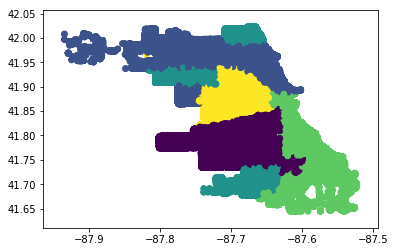

In [34]:
plt.scatter(data['Longitude'], data['Latitude'], c=labels.astype(np.float))
# plt.scatter()
plt.show()

In [35]:
(len(labels), labels)

(1418291, array([4, 3, 1, ..., 0, 3, 3], dtype=int32))

In [36]:
clusters = pd.DataFrame(labels, columns=['Cluster'])
clusters.head()

,Cluster
0,4
1,3
2,1
3,1
4,1


In [37]:
data = pd.concat([data, data2, clusters], axis=1)

In [38]:
data.head()

,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Hour,Month,Day,Primary Type,Arrest,Domestic,Cluster
0,1022,10,24,29,2016,41.8641,-87.7068,23,5,3,BATTERY,1,1,4.0
1,313,3,20,42,2016,41.7829,-87.6044,21,5,3,BATTERY,0,1,3.0
2,1524,15,37,25,2016,41.8949,-87.7584,23,5,3,PUBLIC PEACE VIOLATION,0,0,1.0
3,1532,15,28,25,2016,41.8857,-87.7495,22,5,3,BATTERY,0,0,1.0
4,1523,15,28,25,2016,41.8863,-87.7618,22,5,3,THEFT,0,1,1.0


In [39]:
import matplotlib.patches as pc

def plot_hist(data):
    
    freq = data

    index = freq['index'].tolist()
    values = freq['values'].tolist()
    
    plt.rcParams['figure.figsize'] = (17,15)
    indx = np.arange(len(index)).tolist()
    b = sns.barplot(x=values, y=indx, alpha=1, orient='h')
    b.set_xticklabels(values, fontsize=10,rotation=90)
    b.set_yticklabels(indx, fontsize=8)
    Boxes = [item for item in b.get_children() if isinstance(item, pc.Rectangle)][:-1]
    legend_patches = [pc.Patch(color=C, label=L) for C, L in zip([item.get_facecolor() for item in Boxes], index )]  
    plt.title("Frequency of Crimes")
    plt.ylabel('Type of crime', fontsize=12)
    plt.xlabel('Number of crimes', fontsize=12)
    plt.xlim(min(values)/4, 1.05 * max(values))
    plt.legend(handles=legend_patches)
    # plt.show()
    # plt.savefig('crimes_freq.png', dpi=200)

In [40]:
def remove_objects(data, keep_column):
    x = data[keep_column].value_counts()
    freq = pd.DataFrame()
    freq['index'] = x.index
    freq['values'] = x.values
    freq = freq.query('values > 800')
    return freq

In [41]:
data_cluster_1 = data[data['Cluster'] == 0]
data_cluster_2 = data[data['Cluster'] == 1]
data_cluster_3 = data[data['Cluster'] == 2]
data_cluster_4 = data[data['Cluster'] == 3]
data_cluster_5 = data[data['Cluster'] == 4]

data_cluster_1.head()

,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Hour,Month,Day,Primary Type,Arrest,Domestic,Cluster
5,631,6,8,44,2016,41.7454,-87.6038,22,5,3,BATTERY,0,0,0.0
9,735,7,17,67,2016,41.7681,-87.6639,22,5,3,BATTERY,0,1,0.0
15,831,8,18,66,2016,41.7621,-87.6966,16,5,3,BATTERY,0,1,0.0
27,915,9,11,34,2016,41.8346,-87.6323,12,5,3,DECEPTIVE PRACTICE,0,0,0.0
28,821,8,14,58,2016,41.8147,-87.7055,12,5,3,DECEPTIVE PRACTICE,0,0,0.0


Analysing each cluster on 'Primary Type' column:

In [42]:
data_cluster_1['Primary Type'].value_counts()[:10]

THEFT                  73820
BATTERY                59009
CRIMINAL DAMAGE        34836
NARCOTICS              30554
ASSAULT                20275
OTHER OFFENSE          19619
BURGLARY               18767
DECEPTIVE PRACTICE     15312
MOTOR VEHICLE THEFT    13633
ROBBERY                12583
Name: Primary Type, dtype: int64

In [43]:
data_cluster_2['Primary Type'].value_counts()[:10]

THEFT                  66801
BATTERY                54006
CRIMINAL DAMAGE        31441
NARCOTICS              27436
ASSAULT                18599
OTHER OFFENSE          17588
BURGLARY               16723
DECEPTIVE PRACTICE     14134
MOTOR VEHICLE THEFT    12430
ROBBERY                11698
Name: Primary Type, dtype: int64

In [44]:
data_cluster_3['Primary Type'].value_counts()[:10]

THEFT                  37355
BATTERY                30379
CRIMINAL DAMAGE        17864
NARCOTICS              15565
ASSAULT                10523
OTHER OFFENSE           9854
BURGLARY                9614
DECEPTIVE PRACTICE      7828
MOTOR VEHICLE THEFT     6988
ROBBERY                 6478
Name: Primary Type, dtype: int64

In [45]:
data_cluster_4['Primary Type'].value_counts()[:10]

THEFT                  74819
BATTERY                60520
CRIMINAL DAMAGE        35849
NARCOTICS              30989
ASSAULT                21020
OTHER OFFENSE          19846
BURGLARY               19073
DECEPTIVE PRACTICE     15564
MOTOR VEHICLE THEFT    13838
ROBBERY                12925
Name: Primary Type, dtype: int64

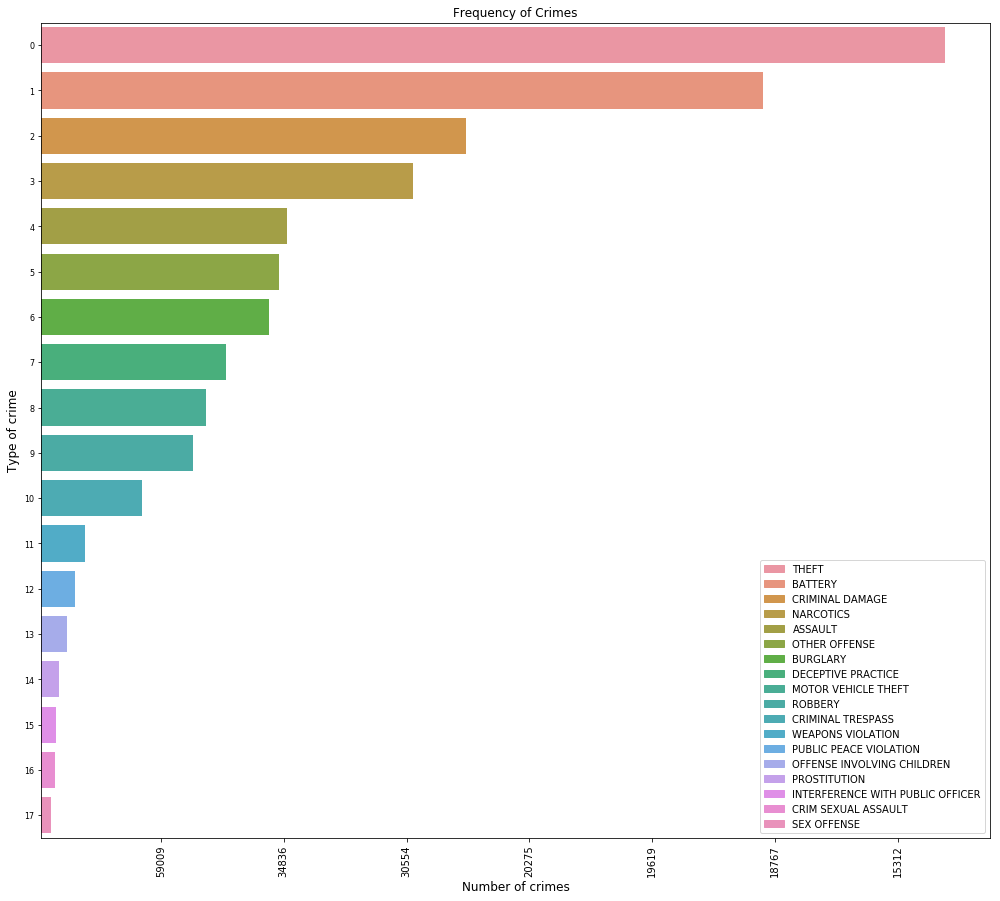

In [46]:
freq = remove_objects(data_cluster_1, 'Primary Type')
plot_hist(freq)

In [47]:
data.head()

,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Hour,Month,Day,Primary Type,Arrest,Domestic,Cluster
0,1022,10,24,29,2016,41.8641,-87.7068,23,5,3,BATTERY,1,1,4.0
1,313,3,20,42,2016,41.7829,-87.6044,21,5,3,BATTERY,0,1,3.0
2,1524,15,37,25,2016,41.8949,-87.7584,23,5,3,PUBLIC PEACE VIOLATION,0,0,1.0
3,1532,15,28,25,2016,41.8857,-87.7495,22,5,3,BATTERY,0,0,1.0
4,1523,15,28,25,2016,41.8863,-87.7618,22,5,3,THEFT,0,1,1.0
